**This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.**

Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')


5 - default: has credit in default? (categorical: 'no','yes','unknown')


6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:


8 - contact: contact communication type (categorical: 'cellular','telephone')


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. # other attributes:


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14 - previous: number of contacts performed before this campaign and for this client (numeric)


15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') # social and economic context attributes


16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):
Description: This feature represents the total number of people employed in the economy.

Impact: A higher number of employed individuals generally indicates a healthy economy, which could lead to increased banking activity (e.g., higher demand for loans or investments). A lower number might indicate economic struggles, leading to reduced banking activity.


21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [82]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

In [83]:
df=data.copy()

In [84]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39796,51,technician,married,university.degree,no,yes,no,cellular,jun,tue,303,1,10,1,success,-1.7,94.055,-39.8,0.702,4991.6,yes
7465,26,admin.,single,high.school,no,no,yes,telephone,may,fri,143,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
37093,27,student,single,high.school,no,no,no,cellular,jul,thu,64,3,999,0,nonexistent,-2.9,92.469,-33.6,0.927,5076.2,no
6652,31,technician,married,university.degree,no,no,yes,telephone,may,wed,125,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30750,31,services,single,high.school,no,yes,no,cellular,may,tue,62,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no


In [85]:
columns=df.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [87]:
       
   # campaign        
   # pdays             
   # previous        
   # poutcome        
   # emp.var.rate    
   # cons.price.idx  
   # cons.conf.idx   
   # euribor3m       
   # nr.employed 

In [88]:
int_cols=[]
obj_cols=[]
flo_cols=[]
for column in df.columns:
        if df[column].dtype == 'int64':
          int_cols.append(column)
        elif df[column].dtype=='object':
          obj_cols.append(column)
        elif df[column].dtype=='float64':
          flo_cols.append(column)


In [89]:
for i in columns:
    unique_values = df[i].unique()
    if len(unique_values) > 30:
        print()
        print(f"{i}: {len(unique_values)}")
    else:
        print()
        print(f"{i}: {unique_values}")



age: 78

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

duration: 1544

campaign: 42

pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous: [0 1 2 3 4 5 6 7]

poutcome: ['nonexistent' 'failure' 'success']

emp.var.rate: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 

Got The Unique Values from the dataframe for each columns their is no redundant value with spelling mistake

# Checking For Null Values

In [90]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Checking Duplicate Rows

In [91]:
index=df[df.duplicated()].index

In [92]:
df.drop(index,inplace=True)

In [93]:
df[df.duplicated()].index

Index([], dtype='int64')

# **EDA**

**Univariate Analysis**

In [94]:
k='Black'

In [95]:
print(int_cols,'\n',flo_cols,'\n',obj_cols)

['age', 'duration', 'campaign', 'pdays', 'previous'] 
 ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


AGE

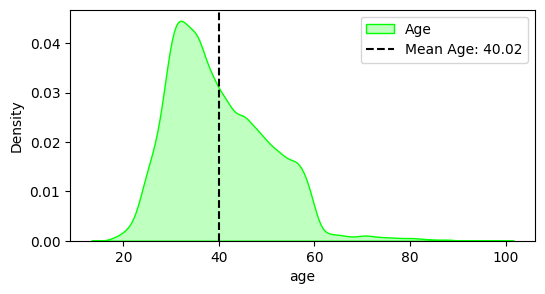

In [96]:
plt.figure(figsize=(6,3))
sns.kdeplot(df['age'], color='lime', shade=True, label='Age')
plt.axvline(x=df['age'].mean(), color='k', linestyle='--', label='Mean Age: {:.2f}'.format(df['age'].mean()))
plt.legend()
plt.show()

Duration

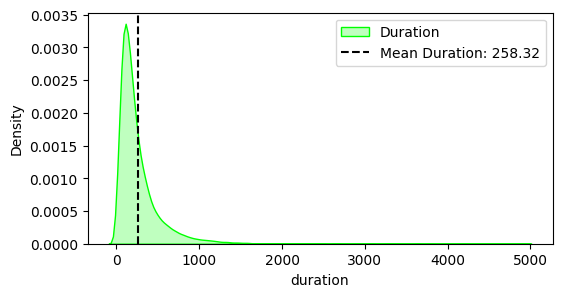

In [97]:
plt.figure(figsize=(6,3))
sns.kdeplot(df['duration'], color='lime', shade=True, label='Duration')
plt.axvline(x=df['duration'].mean(), color='k', linestyle='--', label='Mean Duration: {:.2f}'.format(df['duration'].mean()))
plt.legend()
plt.show()

This Data is skewed towards right this means most of the clients has been never called before

Pdays

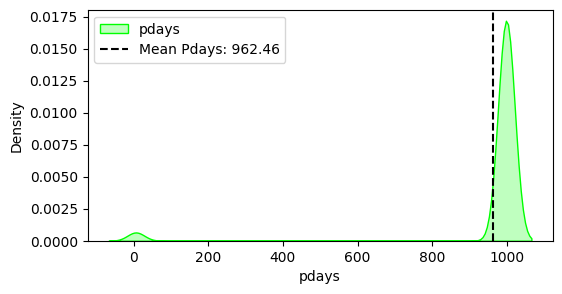

In [98]:
plt.figure(figsize=(6,3))
sns.kdeplot(df['pdays'], color='lime', shade=True, label='pdays')
plt.axvline(x=df['pdays'].mean(), color='k', linestyle='--', label='Mean Pdays: {:.2f}'.format(df['pdays'].mean()))
plt.legend()
plt.show()

As I told in perivous 'duration plot' most of the clients have never been contacted

This plot also make that statement true as most of the value in this pdays column are 999



Job

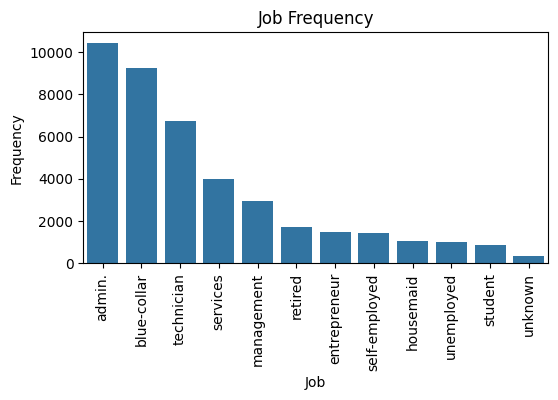

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


In [99]:
plt.figure(figsize=(6,3))

job_counts = df['job'].value_counts()

sns.barplot(x=job_counts.index, y=job_counts.values)
plt.xticks(rotation=90)

plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job Frequency')
plt.show()
print(job_counts)

MARITAL

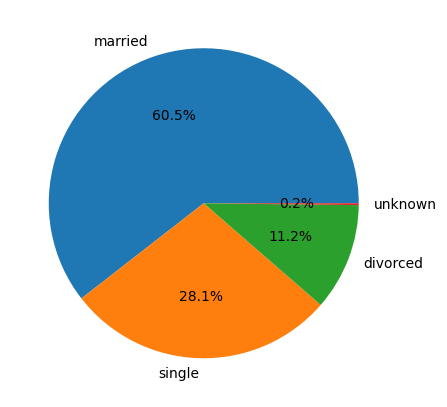

In [100]:
plt.figure(figsize=(5,6))
mar=df['marital'].value_counts()
plt.pie(mar,labels=mar.index,autopct='%1.1f%%');

EDUCATION

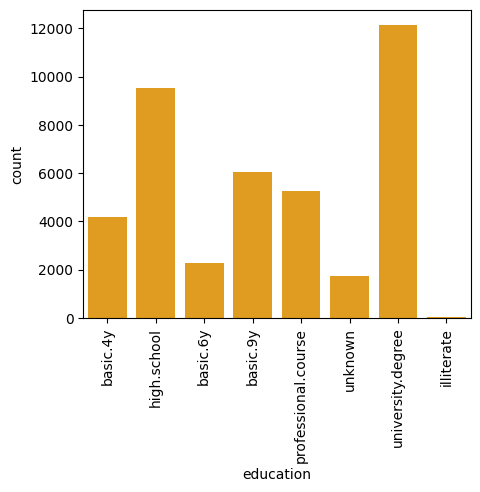

In [101]:
edu=df['education'].value_counts()
edu
plt.figure(figsize=(5,4))
sns.countplot(x='education',data=df,color='orange')
plt.xticks(rotation=90);

DEFAULT

<Axes: xlabel='default', ylabel='count'>

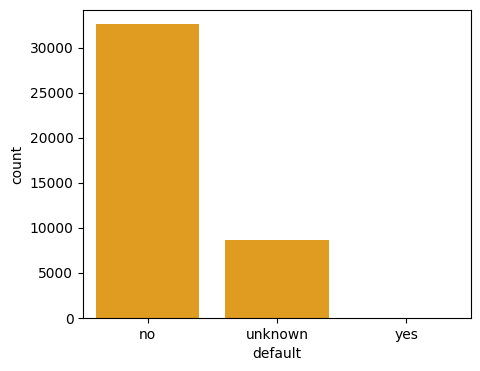

In [102]:
plt.figure(figsize=(5,4))
sns.countplot(x='default', data=df,color='orange')


HOUSING

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


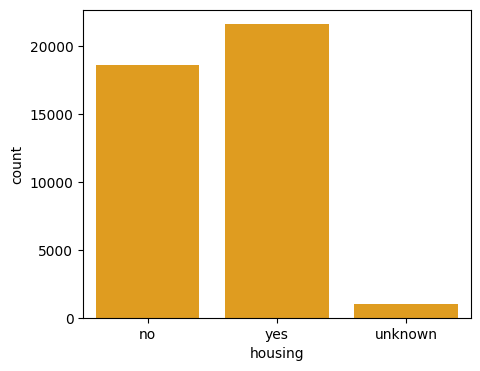

In [103]:
housing=df['housing'].value_counts()
plt.figure(figsize=(5,4))
sns.countplot(x='housing', data=df,color='orange')
print(housing)

LOAN

<Axes: xlabel='loan', ylabel='count'>

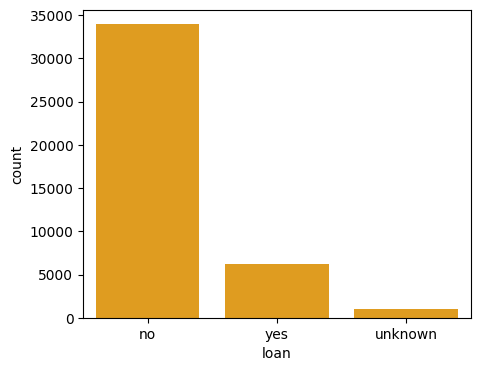

In [104]:
plt.figure(figsize=(5,4))
sns.countplot(x='loan', data=df,color='orange')


CONTACT

<Axes: xlabel='contact', ylabel='count'>

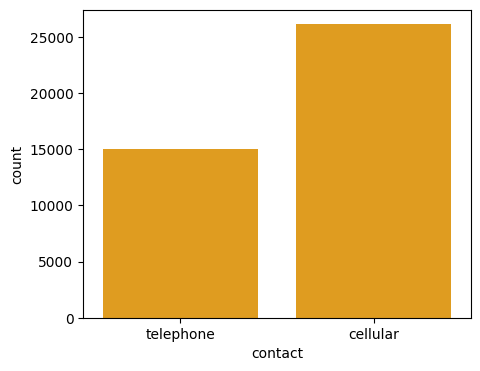

In [105]:

plt.figure(figsize=(5,4))
sns.countplot(x='contact', data=df,color='orange')


MONTH

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64


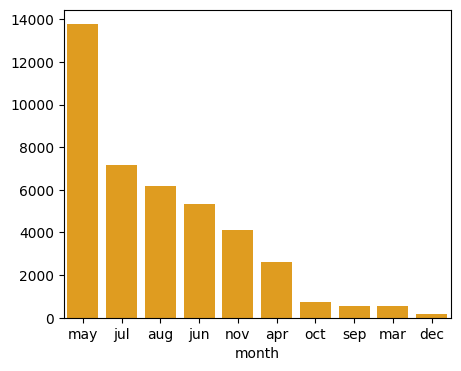

In [106]:
x='month'
temp=df[x].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')
print(temp)

DAY OF WEEK

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64


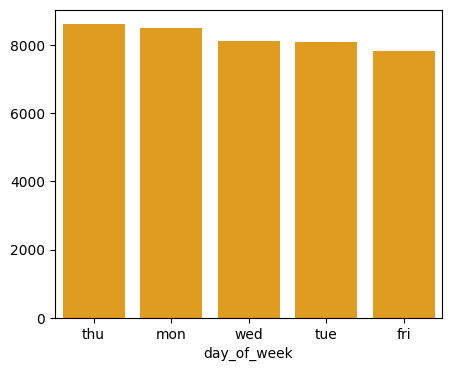

In [107]:
x='day_of_week'
temp=df[x].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')
print(temp)

POUTCOME

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64


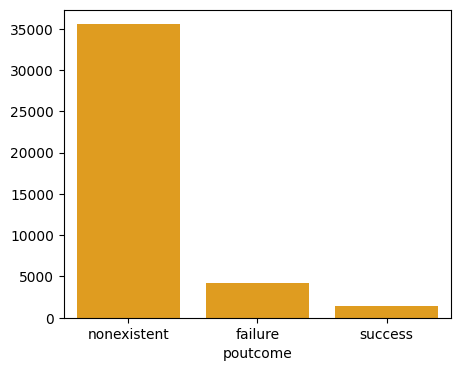

In [108]:
x='poutcome'
temp=df[x].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')
print(temp)

TARGET COLUMN

y
no     36537
yes     4639
Name: count, dtype: int64


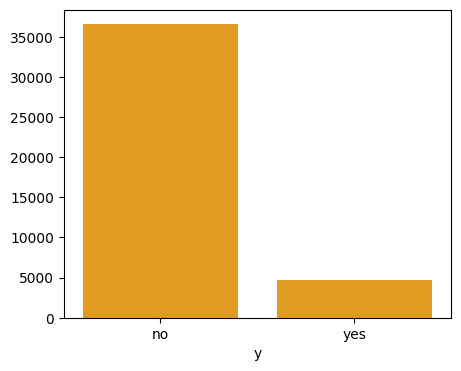

In [109]:
x='y'
temp=df[x].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')
print(temp)

More People Have rejected term loan than people accepted

Data is Uneven we will manage this by techniques like stratified cv

EMPLOYEE VARIABILITY RATE

emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64


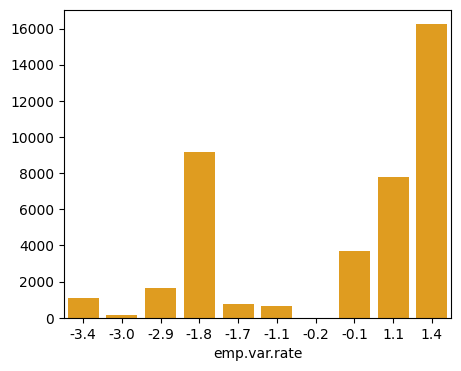

In [110]:
x='emp.var.rate'
temp=df[x].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')
print(temp)

CONSUMER PRICE INDEX

<Axes: xlabel='cons.price.idx'>

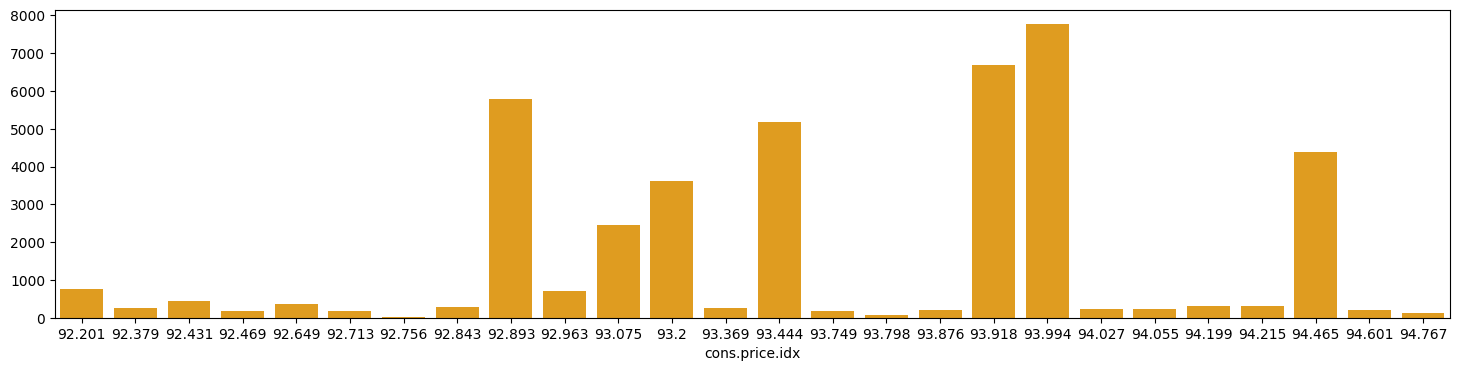

In [111]:
x='cons.price.idx'
temp=df[x].value_counts()
plt.figure(figsize=(18,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')

CONSUMER CONFIDENCE INDEX

<Axes: xlabel='cons.conf.idx'>

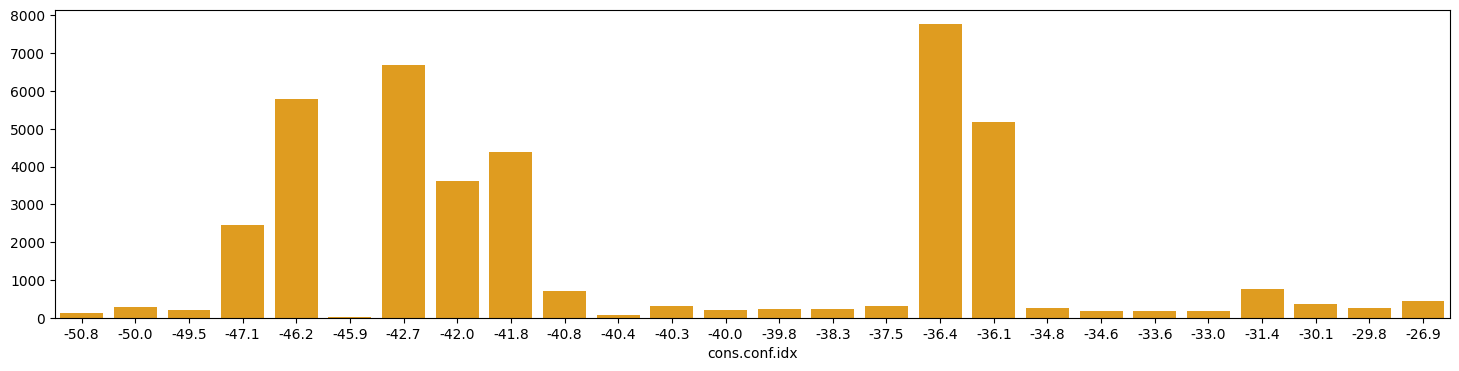

In [112]:
x='cons.conf.idx'
temp=df[x].value_counts()
plt.figure(figsize=(18,4))
sns.barplot(x=temp.index, y=temp.values,color='orange')


EUROBOR

<Axes: ylabel='euribor3m'>

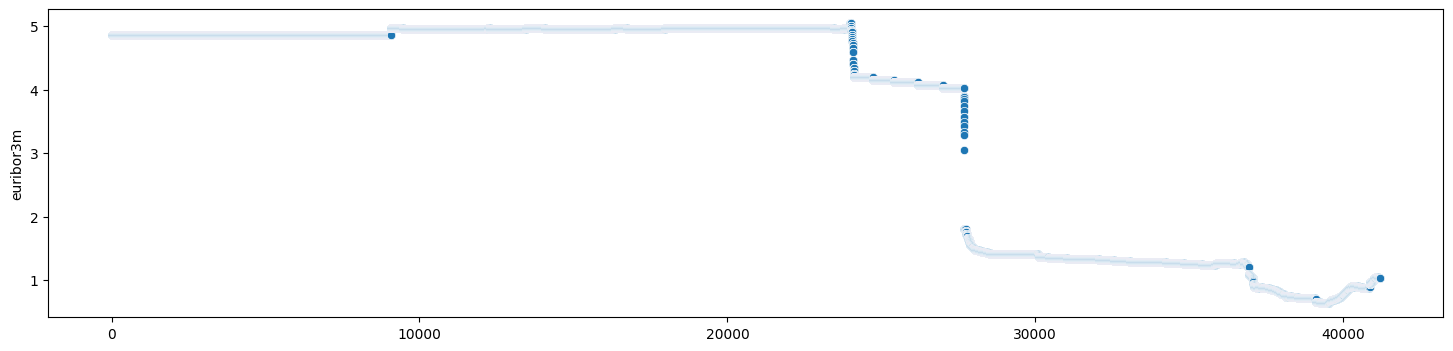

In [113]:
x='euribor3m'
temp=df[x].value_counts()
plt.figure(figsize=(18,4))
sns.scatterplot(df[x])


# **BIVARIATE ANALYSIS**

JOB--Y

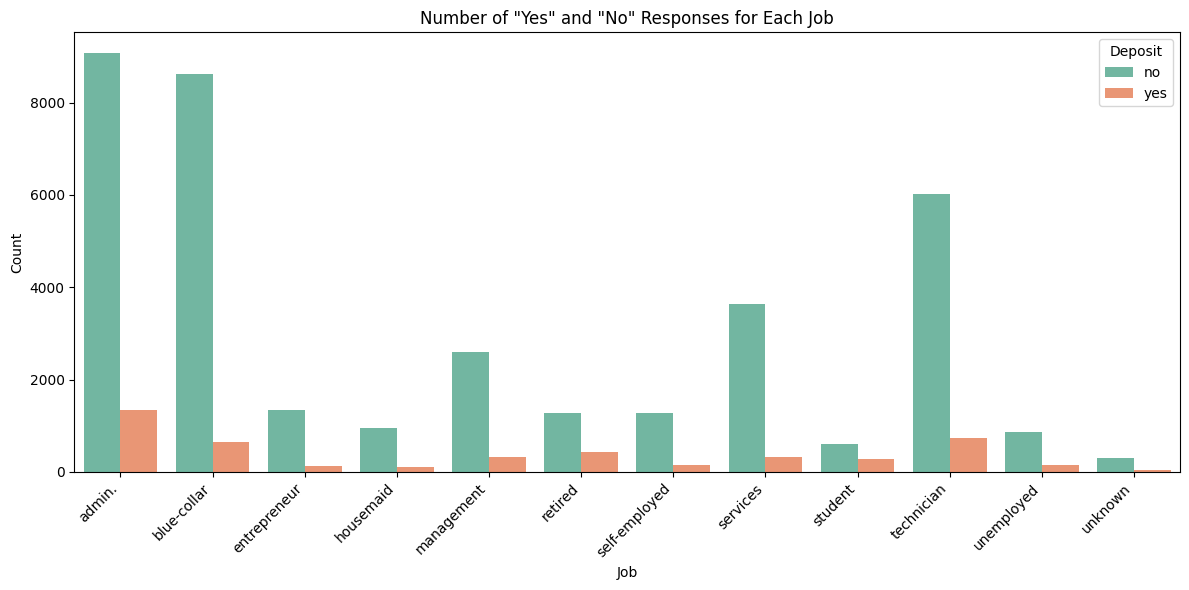

In [114]:

# Grouping the DataFrame by 'job' and 'y', then summing the counts
grouped = df.groupby(['job', 'y']).size().unstack(fill_value=0).reset_index()

# Melt the DataFrame to have 'job' as the identifier variable
melted = pd.melt(grouped, id_vars='job', var_name='Response', value_name='Count')

# Plotting grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='Count', hue='Response', data=melted, palette='Set2')
plt.title('Number of "Yes" and "No" Responses for Each Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit')
plt.tight_layout()
plt.show()

We can say on the basis of data that job profile admin have subscirbed to term-deposit more

But Retired People,students and self-employeed people are tend to subscribe more if we see their acceptance ratio

MARITAL--Y

In [115]:
gr=df.groupby(['marital', 'y']).size().unstack(fill_value=0).reset_index()
gr

y,marital,no,yes
0,divorced,4135,476
1,married,22390,2531
2,single,9944,1620
3,unknown,68,12


divorced,married,single,unknown WITH y

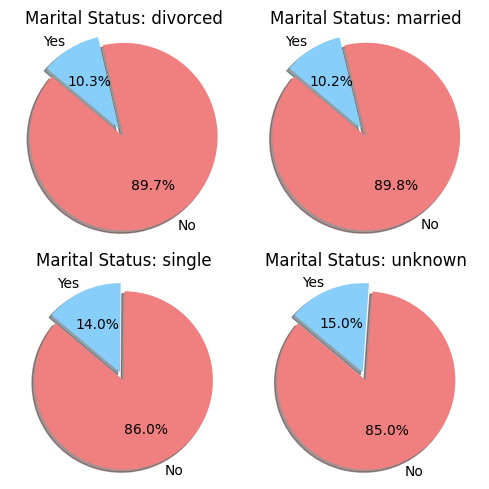

In [116]:
import matplotlib.pyplot as plt

# Define colors for the pie slices
colors = ['lightcoral', 'lightskyblue']

# Define explode for the pie slices (to emphasize 'Yes')
explode = (0, 0.1)

labels = ['No', 'Yes']

autopct = '%1.1f%%'
startangle = 140

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i, (_, row) in enumerate(gr.iterrows()):
    counts = [row['no'], row['yes']]

    axs[i].pie(counts, labels=labels, colors=colors, autopct=autopct, startangle=startangle, explode=explode, shadow=True)

    axs[i].set_title(f'Marital Status: {row["marital"]}')
    axs[i].axis('equal')
plt.tight_layout()
plt.show()


Based On Data We can say that people with,

Marital Status =Unknown ,Single Have High Subscription ratio

DEFAULT--Y

In [117]:
gr1=df.groupby(['default','y']).size().unstack(fill_value=0).reset_index()
gr1

y,default,no,yes
0,no,28381,4196
1,unknown,8153,443
2,yes,3,0


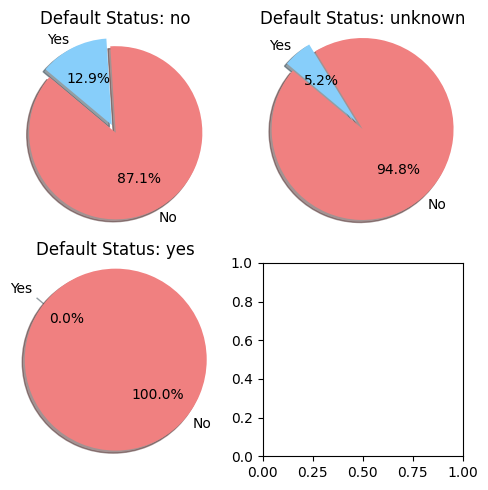

In [118]:
import matplotlib.pyplot as plt

# Define colors for the pie slices
colors = ['lightcoral', 'lightskyblue']

# Define explode for the pie slices (to emphasize 'Yes')
explode = (0, 0.1)

labels = ['No', 'Yes']

autopct = '%1.1f%%'
startangle = 140

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i, (_, row) in enumerate(gr1.iterrows()):
    counts = [row['no'], row['yes']]

    axs[i].pie(counts, labels=labels, colors=colors, autopct=autopct, startangle=startangle, explode=explode, shadow=True)

    axs[i].set_title(f'Default Status: {row["default"]}')
    axs[i].axis('equal')
plt.tight_layout()
plt.show()


People who Have no Default are tend to subscribe term deposite more than the people who have defaulted

HOOUSING--Y

In [119]:
gr2=df.groupby(['housing','y']).size().unstack().reset_index()
gr2

y,housing,no,yes
0,no,16590,2025
1,unknown,883,107
2,yes,19064,2507


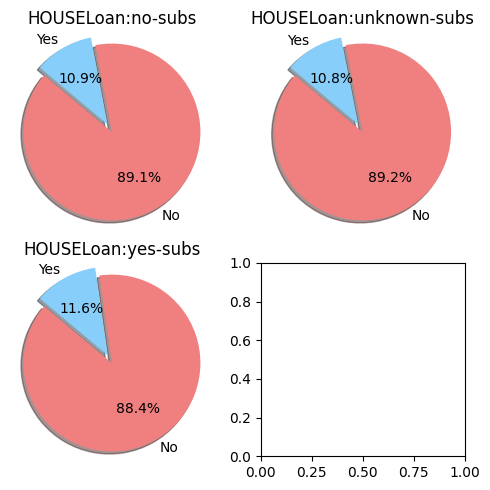

In [120]:
import matplotlib.pyplot as plt

# Define colors for the pie slices
colors = ['lightcoral', 'lightskyblue']

# Define explode for the pie slices (to emphasize 'Yes')
explode = (0, 0.1)

labels = ['No', 'Yes']

autopct = '%1.1f%%'
startangle = 140

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i, (_, row) in enumerate(gr2.iterrows()):
    counts = [row['no'], row['yes']]

    axs[i].pie(counts, labels=labels, colors=colors, autopct=autopct, startangle=startangle, explode=explode, shadow=True)

    axs[i].set_title(f'HOUSELoan:{row["housing"]}-subs')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


There is no or little relationship between housing loan and term deposit

LOAN--Y

In [121]:
gr3=df.groupby(['loan','y']).size().unstack().reset_index()
gr3

y,loan,no,yes
0,no,30089,3849
1,unknown,883,107
2,yes,5565,683


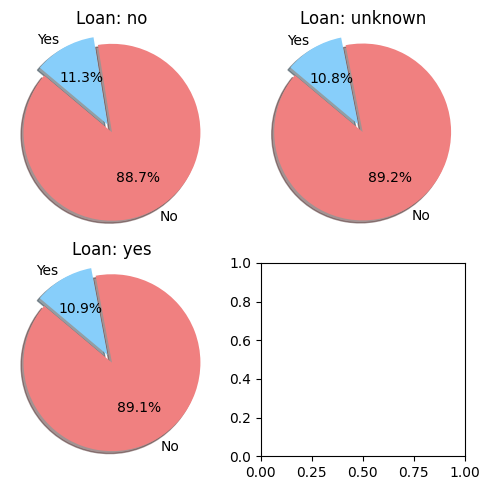

In [122]:
import matplotlib.pyplot as plt

# Define colors for the pie slices
colors = ['lightcoral', 'lightskyblue']

# Define explode for the pie slices (to emphasize 'Yes')
explode = (0, 0.1)

# Define labels for the pie slices
labels = ['No', 'Yes']

autopct = '%1.1f%%'
startangle = 140

# Plotting pie charts
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i, (_, row) in enumerate(gr3.iterrows()):
    counts = [row['no'], row['yes']]

    axs[i].pie(counts, labels=labels, colors=colors, autopct=autopct, startangle=startangle, explode=explode, shadow=True)

    axs[i].set_title(f'Loan: {row["loan"]}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and show plot
plt.tight_layout()
plt.show()


No Conclusion Can be drawn as people with loan ,no loan and unknown all are subscribing term deposite with same ratio

CONTACT--Y

In [123]:
gr4=df.groupby(['contact','y']).size().unstack().reset_index()
gr4

y,contact,no,yes
0,cellular,22283,3852
1,telephone,14254,787


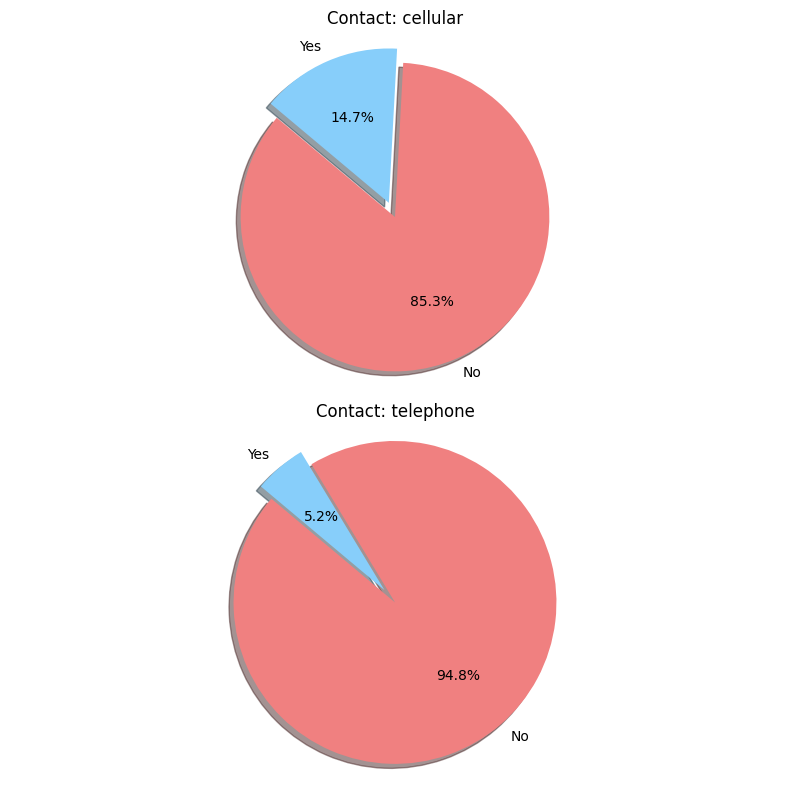

In [124]:
import matplotlib.pyplot as plt

# Define colors for the pie slices
colors = ['lightcoral', 'lightskyblue']

# Define explode for the pie slices (to emphasize 'Yes')
explode = (0, 0.1)

# Define labels for the pie slices
labels = ['No', 'Yes']

autopct = '%1.1f%%'
startangle = 140

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs = axs.flatten()

for i, (_, row) in enumerate(gr4.iterrows()):
    counts = [row['no'], row['yes']]

    axs[i].pie(counts, labels=labels, colors=colors, autopct=autopct, startangle=startangle, explode=explode, shadow=True)

    axs[i].set_title(f'Contact: {row["contact"]}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and show plot
plt.tight_layout()
plt.show()


People Who Are Contacted through cellular medium are tend to subscribe for term deposite more than people contacted throug telephone

MONTH--Y

In [125]:
gr5=df.groupby(['month','y']).size().unstack().reset_index()
gr5

y,month,no,yes
0,apr,2092,539
1,aug,5521,655
2,dec,93,89
3,jul,6521,648
4,jun,4759,559
5,mar,270,276
6,may,12881,886
7,nov,3684,416
8,oct,402,315
9,sep,314,256


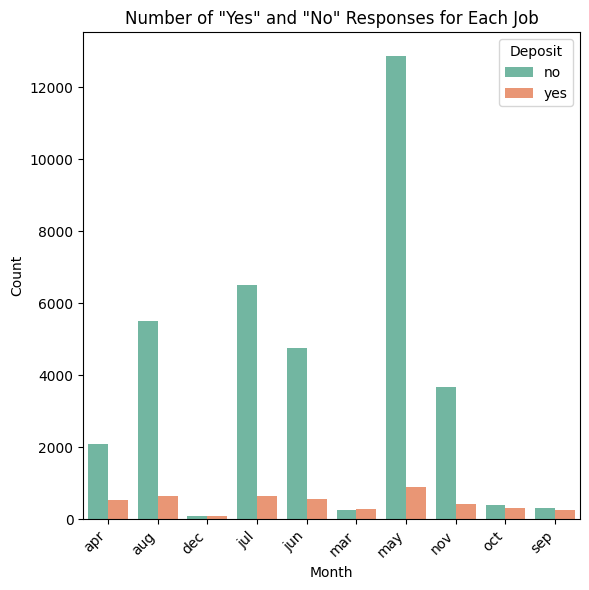

In [126]:
melted = pd.melt(gr5, id_vars='month', var_name='Response', value_name='Count')
melted['percent']=round(melted['Count']*100/melted.groupby('month')['Count'].transform('sum'),1)
melted['percent']=melted['percent'].apply(lambda x: '{}%'.format(x))
# Plotting grouped bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='month', y='Count', hue='Response', data=melted, palette='Set2')
plt.title('Number of "Yes" and "No" Responses for Each Job')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit')
plt.tight_layout()
plt.show()

There is more subscription in month of may

But There is good subscription in oct,sep,april,june,july in term of no and yes ratio

<Axes: xlabel='month', ylabel='contacts'>

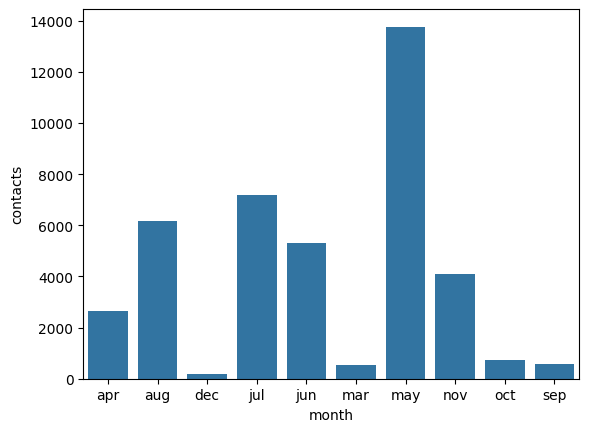

In [127]:
# Grouping by 'month' and 'contact', then getting value counts
contact_counts = df.groupby(['month', 'contact']).size()

# Resetting the index to make 'month' and 'contact' as columns
contact_counts = contact_counts.reset_index(name='count')

# Summing 'count' for each month
monthly_contact_sum = contact_counts.groupby('month')['count'].sum()

new_df = pd.DataFrame(monthly_contact_sum)

new_df = new_df.rename(columns={'count': 'contacts'})

sns.barplot(x='month',y='contacts',data=new_df)

We Can See That Number Of Contact In oct,sep,april,june,july if we increase our contact to people in these month then bank can get high subscription as in these month rejection is less as compared to other
months


DAY OF WEEK---Y

In [128]:
gr6=df.groupby(['day_of_week','y']).size().unstack().reset_index()
gr6

y,day_of_week,no,yes
0,fri,6980,846
1,mon,7665,847
2,thu,7574,1044
3,tue,7133,953
4,wed,7185,949


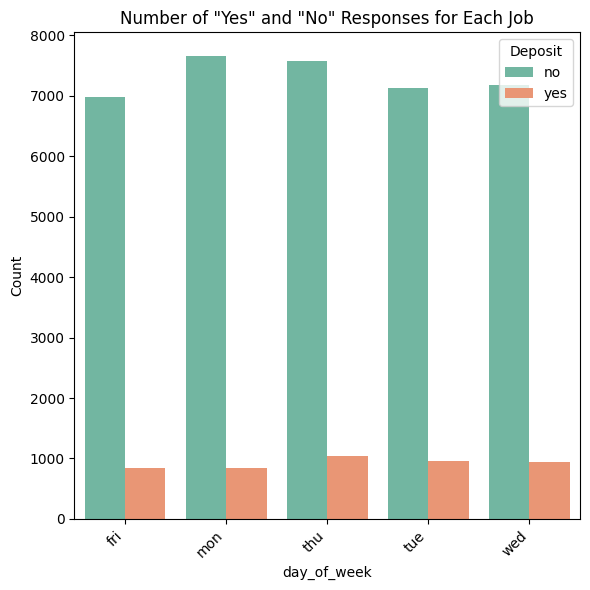

In [129]:
melted = pd.melt(gr6, id_vars='day_of_week', var_name='Response', value_name='Count')
# Plotting grouped bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='day_of_week', y='Count', hue='Response', data=melted, palette='Set2')
plt.title('Number of "Yes" and "No" Responses for Each Job')
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit')
plt.tight_layout()
plt.show()

People tend to Subscribe more on thursday

EMPLOYEE VARIABILTY RATE --Y

In [130]:
m=df['emp.var.rate'].mean()
above_avg=df[df['emp.var.rate']>m]
av=above_avg.groupby('y').size()
below_avg=df[df['emp.var.rate']<m]
bv=below_avg.groupby('y').size()

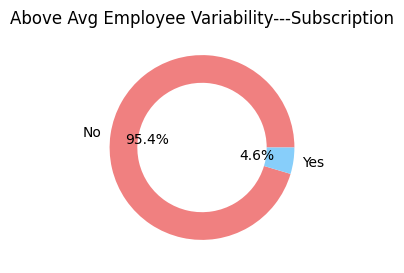

In [131]:
plt.figure(figsize=(3,3))
plt.pie(av, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors);
plt.title('Above Avg Employee Variability---Subscription');

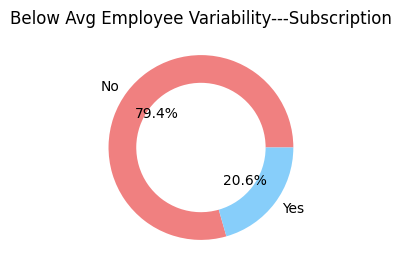

In [132]:
plt.figure(figsize=(3,3))
plt.pie(bv, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Below Avg Employee Variability---Subscription');

When There is High Employee Variability Subscription Is Less

When There is Low Employee Variability Subscription Is More

emp.var.rate (Employment Variation Rate - Quarterly Indicator):

Description: This measures the quarterly change in the employment rate. A positive rate indicates an increase in employment, while a negative rate indicates a decrease.

Impact: Higher employment variation rates may signal a stronger economy and increase consumer confidence, leading to a higher likelihood of positive outcomes (e.g., loan approvals or new accounts). Conversely, a negative rate might suggest economic downturns, reducing the likelihood of positive outcomes.

CONSUMER PRICE INDEX----Y

In [133]:
m=df['cons.price.idx'].mean()
above_avg=df[df['cons.price.idx']>m]
av=above_avg.groupby('y').size()
below_avg=df[df['cons.price.idx']<m]
bv=below_avg.groupby('y').size()

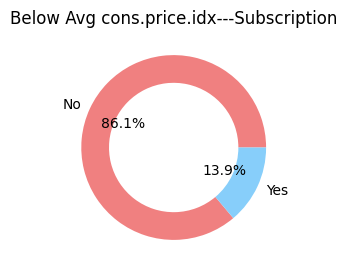

In [134]:
plt.figure(figsize=(3,3))
plt.pie(bv, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Below Avg cons.price.idx---Subscription');

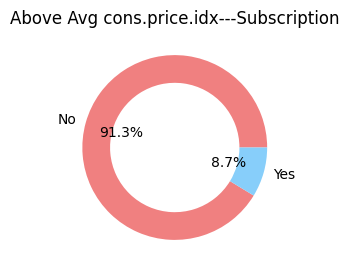

In [135]:
plt.figure(figsize=(3,3))
plt.pie(av, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Above Avg cons.price.idx---Subscription');

We Can See When Consumer Price Index is Below Avg Subscription Increases

We Can See When Consumer Price Index is Above Avg Subscription Decreases

Description: The consumer price index (CPI) measures the average change in prices paid by consumers for goods and services over time.

Impact: Higher CPI values often indicate inflation. In high-inflation periods, consumers might reduce spending or borrowing, which could negatively affect bank-related activities. Conversely, a stable or moderate CPI could encourage spending and borrowing, positively influencing your predictions

CONSUMER CONFIDENCE INDEX --Y

In [136]:
m=df['cons.conf.idx'].mean()
above_avg=df[df['cons.conf.idx']>m]
av=above_avg.groupby('y').size()
below_avg=df[df['cons.conf.idx']<m]
bv=below_avg.groupby('y').size()

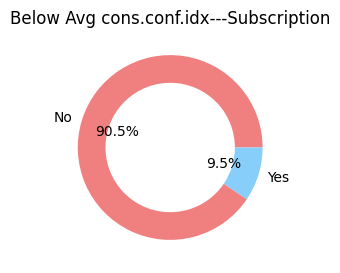

In [137]:
plt.figure(figsize=(3,3))
plt.pie(bv, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Below Avg cons.conf.idx---Subscription');

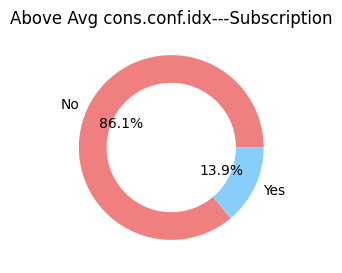

In [138]:
plt.figure(figsize=(3,3))
plt.pie(av, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Above Avg cons.conf.idx---Subscription');

We can see that when consumer confidence index is above avg subscription increases

We can see that when consumer confidence index is below avg subscription decreases

Description: This index reflects how optimistic or pessimistic consumers are regarding their financial situation and the economy.

Impact: A higher consumer confidence index typically correlates with increased spending and borrowing, which could lead to a higher likelihood of positive outcomes in banking activities. Lower confidence may suggest caution among consumers, reducing the likelihood of such outcomes

EURO BOR--Y

In [139]:
m=df['euribor3m'].mean()
above_avg=df[df['euribor3m']>m]
av=above_avg.groupby('y').size()
below_avg=df[df['euribor3m']<m]
bv=below_avg.groupby('y').size()

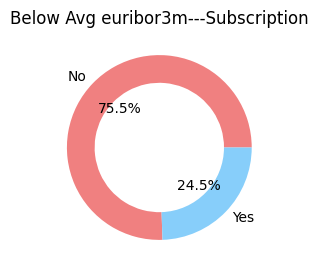

In [140]:
plt.figure(figsize=(3,3))
plt.pie(bv, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Below Avg euribor3m---Subscription');

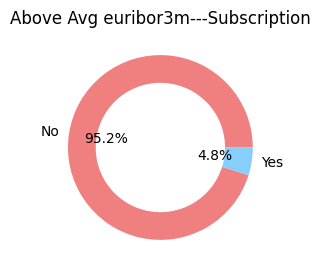

In [141]:
plt.figure(figsize=(3,3))
plt.pie(av, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Above Avg euribor3m---Subscription');

We can see when the euribor is below avg people tends to subscribe term deposit more than when euribor is above avg..


**But Why So???**

Low EURIBOR rates may lead to lower borrowing costs for banks, which could incentivize them to offer more favorable terms on term deposits to attract funding. Banks may also use term deposits as a source of funding for their lending activities, offering competitive rates to attract depositors.

Description: The Euribor (Euro Interbank Offered Rate) is the rate at which European banks lend to each other for short-term loans (3 months in this case).

Impact: Higher Euribor rates might lead to higher borrowing costs for consumers, potentially reducing their demand for loans or credit products. Lower rates could make borrowing more attractive, positively influencing your predictions.

DURATION--Y

In [142]:
m=df['duration'].mean()
above_avg=df[df['duration']>m]
av=above_avg.groupby('y').size()
below_avg=df[df['duration']<m]
bv=below_avg.groupby('y').size()

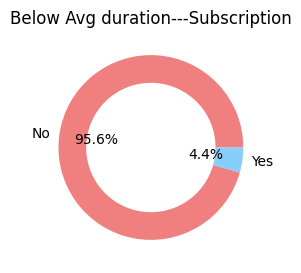

In [143]:
plt.figure(figsize=(3,3))
plt.pie(bv, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Below Avg duration---Subscription');

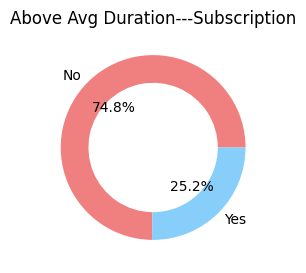

In [144]:
plt.figure(figsize=(3,3))
plt.pie(av, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title('Above Avg Duration---Subscription');

We can Clearly see that there is hogh correlation between duration and Y column

As Duration Increases People Subscription Increases


***But***,
we cannot use duration column in our prediction model as we have to predict the outcome will people subscribe to term deposite if yes then only we are going to call them
Hence,we will drop duration column while building predictive models

HEATMAP

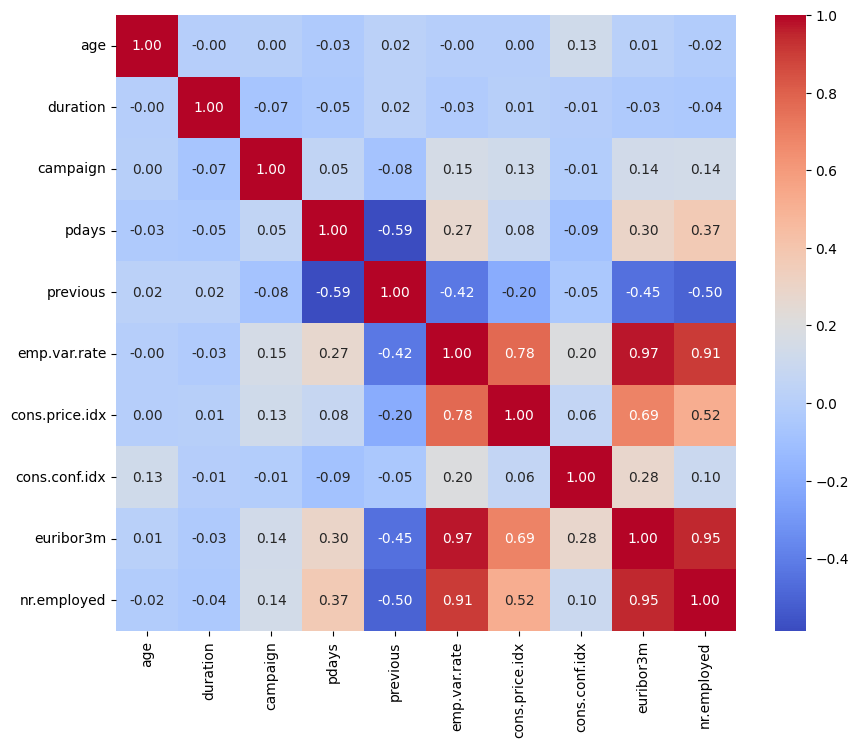

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [146]:
print('int_cols:',int_cols)
print('obj_cols:',obj_cols)
print('flo_cols:',flo_cols)

int_cols: ['age', 'duration', 'campaign', 'pdays', 'previous']
obj_cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
flo_cols: ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le=LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])


df['y'] = le.fit_transform(df['y'])



df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [149]:
df.shape

(41176, 21)

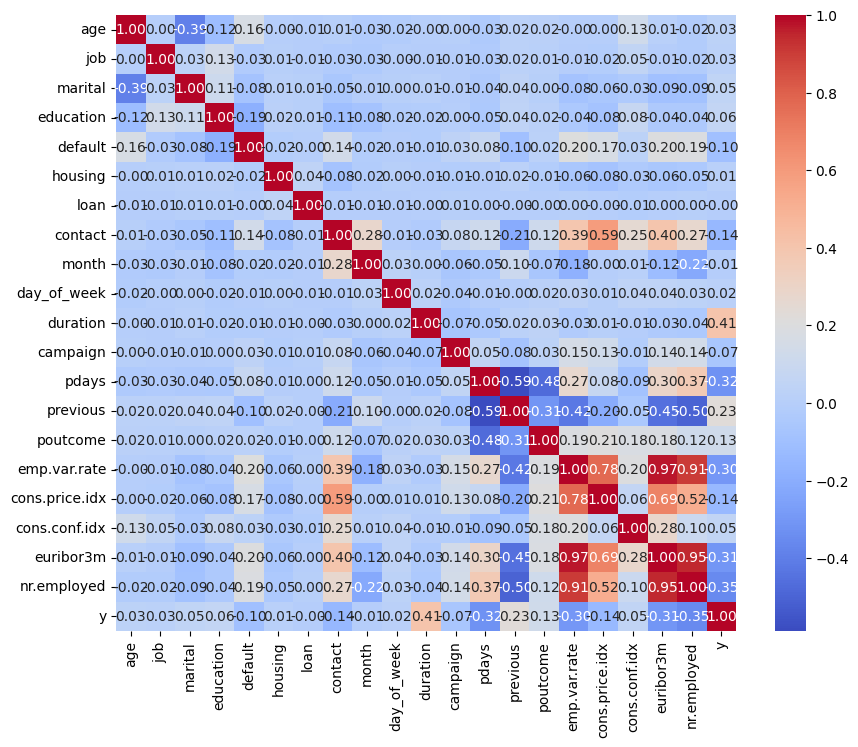

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [151]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001270,-0.389829,-0.117960,0.164939,-0.001477,-0.007359,0.006917,-0.025023,-0.017614,-0.000808,0.004622,-0.034381,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.001270,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,-0.006408,-0.006865,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.389829,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,0.010278,-0.007189,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.117960,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,-0.015086,0.000406,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
default,0.164939,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,-0.011805,0.032809,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
housing,-0.001477,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,-0.007688,-0.011074,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007359,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,-0.000970,0.005119,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.006917,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,-0.026665,0.077387,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,-0.025023,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,0.003637,-0.062128,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
day_of_week,-0.017614,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,0.021990,-0.038254,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


In [152]:
le.classes_

array(['no', 'yes'], dtype=object)

In [153]:
df=df.drop('duration',axis=1)

In [154]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int64  
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [156]:
df.shape

(41176, 20)

WE WILL DO 2 APPROACHES AS DATA IS IMBALANCED

1)Stratified Train Valid Test Split & Stratified CV

2)UNDER SAMPLING AND THEN PERFORMING CV

In [157]:
X=df.drop(columns=['y'])
y=df['y'].values

In [158]:
print(X.shape)
print(y.shape)

(41176, 19)
(41176,)


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [161]:
# Then, split the test set into validation and test sets (50% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [162]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36454,24,9,2,5,0,0,0,0,4,3,2,999,1,0,-2.9,92.963,-40.8,1.262,5076.2
1233,32,1,1,5,0,0,0,1,6,2,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0
24111,33,6,2,6,0,0,0,1,7,2,1,999,0,1,-0.1,93.200,-42.0,4.245,5195.8
15516,38,2,1,2,0,0,2,1,3,0,4,999,0,1,1.4,93.918,-42.7,4.957,5228.1
17916,39,7,1,3,0,2,2,0,3,3,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1


In [163]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

In [164]:
# X_train_scaled=scaler.fit_transform(X_train)
# X_valid_scaled=scaler.transform(X_valid)
# X_test_scaled=scaler.transform(X_test)

In [165]:
# X_train=pd.DataFrame(X_train_scaled,columns=X_train.columns)
# X_valid=pd.DataFrame(X_valid_scaled,columns=X_valid.columns)
# X_test=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [166]:
X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_valid=pd.DataFrame(X_valid,columns=X_valid.columns)
X_test=pd.DataFrame(X_test,columns=X_test.columns)

## **Model Selection**

In [167]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def calculate_classification_metrics(y_true, y_pred, threshold):
    """
    Calculate classification metrics including accuracy, precision, recall, F1-score, and AUC.

    Parameters:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted probabilities or scores.
    - threshold (float): Threshold value for binary classification (default=0.5).

    Returns:
    - metrics (dict): A dictionary containing classification metrics.
    """
    # Convert predicted probabilities or scores to binary predictions based on the threshold
    y_pred_binary = (y_pred >= threshold).astype(int)

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    confusion = confusion_matrix(y_true, y_pred_binary)

    # Calculate AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_value = auc(fpr, tpr)  # Use the auc function from sklearn.metrics

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': confusion,
        'AUC': auc_value
    }

    return metrics

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### RANDOM FOREST

In [169]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [170]:
X_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36454,24,9,2,5,0,0,0,0,4,3,2,999,1,0,-2.9,92.963,-40.8,1.262,5076.2
1233,32,1,1,5,0,0,0,1,6,2,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0
24111,33,6,2,6,0,0,0,1,7,2,1,999,0,1,-0.1,93.200,-42.0,4.245,5195.8
15516,38,2,1,2,0,0,2,1,3,0,4,999,0,1,1.4,93.918,-42.7,4.957,5228.1
17916,39,7,1,3,0,2,2,0,3,3,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1


In [171]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [172]:
rfc.predict([[66	,1	,1	,7	,0	,2	,0	,0	,6	,4	,2	,6	,2	,2	,-1.8	,93.876	,-40.0	,0.682	,5008.7]])

array([1])

In [173]:
y_train_preds = rfc.predict_proba(X_train)[:,1]
y_valid_preds = rfc.predict_proba(X_valid)[:,1]


In [174]:
y_train_preds

array([0.35977333, 0.0238839 , 0.13448837, ..., 0.02861497, 0.05956417,
       0.05540692])

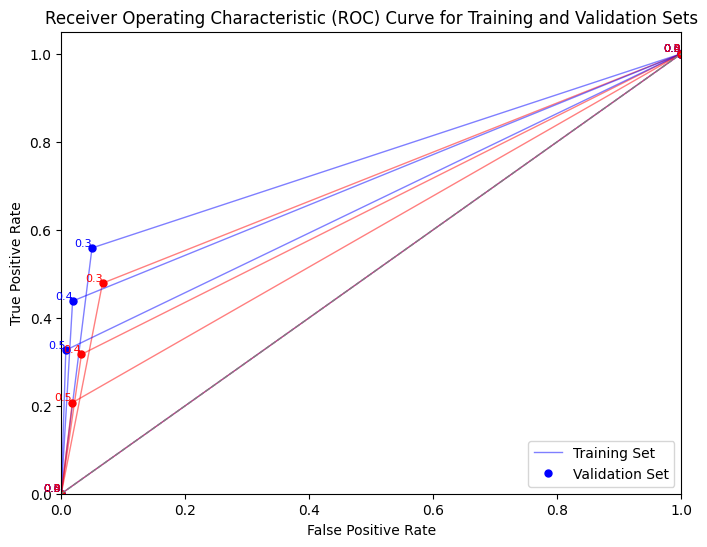

In [175]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

thresholds = [0, 0.3, 0.4, 0.5]
plt.figure(figsize=(8, 6))

for threshold in thresholds:
    # Plot ROC curve for training set
    y_train_pred = (y_train_preds >= threshold).astype(int)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    plt.plot(fpr_train, tpr_train, lw=1, color='blue', alpha=0.5)
    plt.plot(fpr_train, tpr_train, 'o', color='blue', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_train, tpr_train):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='blue', fontsize=8, ha='right', va='bottom')

    # Plot ROC curve for validation set
    y_valid_pred = (y_valid_preds >= threshold).astype(int)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_pred)
    plt.plot(fpr_valid, tpr_valid, lw=1, color='red', alpha=0.5)
    plt.plot(fpr_valid, tpr_valid, 'o', color='red', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_valid, tpr_valid):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='red', fontsize=8, ha='right', va='bottom')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training and Validation Sets')
plt.legend(['Training Set', 'Validation Set'], loc="lower right")
plt.show()


In [176]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


print('Training:',calculate_classification_metrics(y_train, y_train_preds, threshold=0.3))
print('Validation:',calculate_classification_metrics(y_valid, y_valid_preds, threshold=0.3))

Training: {'Accuracy': 0.9062841530054645, 'Precision': 0.5885860306643952, 'Recall': 0.5586095392077607, 'F1-score': 0.5732061385317295, 'Confusion Matrix': array([[27780,  1449],
       [ 1638,  2073]]), 'AUC': 0.8553608479871068}
Validation: {'Accuracy': 0.8822243807673628, 'Precision': 0.4774193548387097, 'Recall': 0.47844827586206895, 'F1-score': 0.47793326157158234, 'Confusion Matrix': array([[3411,  243],
       [ 242,  222]]), 'AUC': 0.8073379668950418}


## **Logistic Regression**

In [177]:
lr=LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [178]:
y_train_preds = lr.predict_proba(X_train)[:,1]
y_valid_preds = lr.predict_proba(X_valid)[:,1]


In [179]:
y_train_preds

array([0.22466373, 0.05551965, 0.05506987, ..., 0.05669465, 0.04303917,
       0.0534578 ])

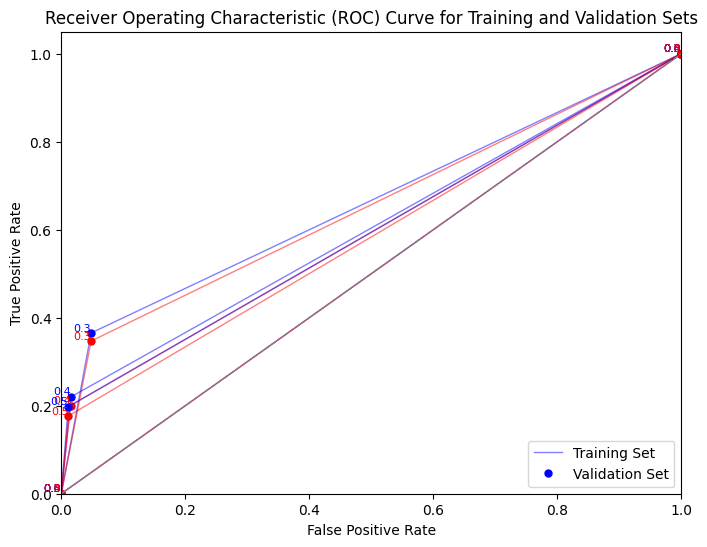

In [180]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

thresholds = [0, 0.3, 0.4, 0.5]
plt.figure(figsize=(8, 6))

for threshold in thresholds:
    # Plot ROC curve for training set
    y_train_pred = (y_train_preds >= threshold).astype(int)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    plt.plot(fpr_train, tpr_train, lw=1, color='blue', alpha=0.5)
    plt.plot(fpr_train, tpr_train, 'o', color='blue', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_train, tpr_train):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='blue', fontsize=8, ha='right', va='bottom')

    # Plot ROC curve for validation set
    y_valid_pred = (y_valid_preds >= threshold).astype(int)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_pred)
    plt.plot(fpr_valid, tpr_valid, lw=1, color='red', alpha=0.5)
    plt.plot(fpr_valid, tpr_valid, 'o', color='red', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_valid, tpr_valid):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='red', fontsize=8, ha='right', va='bottom')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training and Validation Sets')
plt.legend(['Training Set', 'Validation Set'], loc="lower right")
plt.show()


In [181]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


print('Training:',calculate_classification_metrics(y_train, y_train_preds, threshold=0.3))
print('Validation:',calculate_classification_metrics(y_valid, y_valid_preds, threshold=0.3))

Training: {'Accuracy': 0.8857316332726168, 'Precision': 0.4904159132007233, 'Recall': 0.3654001616814875, 'F1-score': 0.41877702285361335, 'Confusion Matrix': array([[27820,  1409],
       [ 2355,  1356]]), 'AUC': 0.7636528198947201}
Validation: {'Accuracy': 0.883681398737251, 'Precision': 0.47774480712166173, 'Recall': 0.34698275862068967, 'F1-score': 0.4019975031210986, 'Confusion Matrix': array([[3478,  176],
       [ 303,  161]]), 'AUC': 0.7566572060849707}


### KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 150)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=150)

In [183]:
y_train_predsknn = knn.predict_proba(X_train)[:,1]
y_valid_predsknn = knn.predict_proba(X_valid)[:,1]

In [184]:
print('Training:',calculate_classification_metrics(y_train, y_train_predsknn, threshold=0.3))
print('Validation:',calculate_classification_metrics(y_valid, y_valid_predsknn, threshold=0.3))

Training: {'Accuracy': 0.8797510625379478, 'Precision': 0.4665058949624866, 'Recall': 0.4691457828078685, 'F1-score': 0.46782211473868063, 'Confusion Matrix': array([[27238,  1991],
       [ 1970,  1741]]), 'AUC': 0.8041416169562979}
Validation: {'Accuracy': 0.8708110733365712, 'Precision': 0.42887029288702927, 'Recall': 0.4418103448275862, 'F1-score': 0.43524416135881105, 'Confusion Matrix': array([[3381,  273],
       [ 259,  205]]), 'AUC': 0.787716401959119}


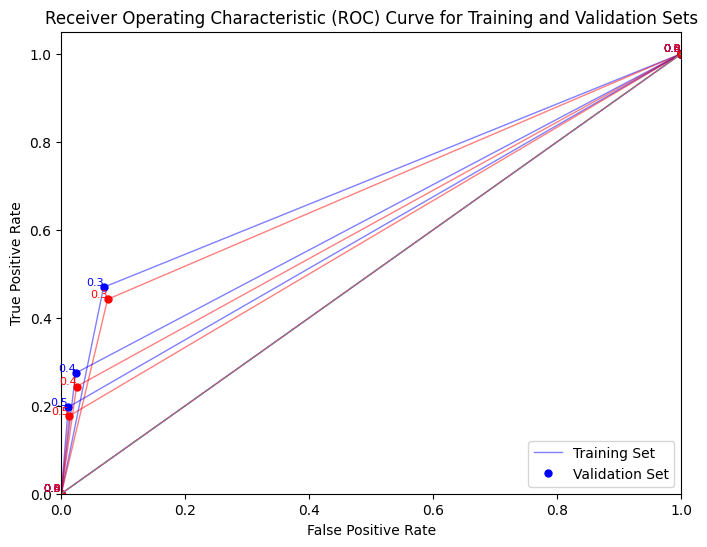

In [185]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

thresholds = [0, 0.3, 0.4, 0.5]
plt.figure(figsize=(8, 6))

for threshold in thresholds:
    # Plot ROC curve for training set
    y_train_pred = (y_train_predsknn >= threshold).astype(int)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    plt.plot(fpr_train, tpr_train, lw=1, color='blue', alpha=0.5)
    plt.plot(fpr_train, tpr_train, 'o', color='blue', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_train, tpr_train):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='blue', fontsize=8, ha='right', va='bottom')

    # Plot ROC curve for validation set
    y_valid_pred = (y_valid_predsknn >= threshold).astype(int)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_pred)
    plt.plot(fpr_valid, tpr_valid, lw=1, color='red', alpha=0.5)
    plt.plot(fpr_valid, tpr_valid, 'o', color='red', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_valid, tpr_valid):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='red', fontsize=8, ha='right', va='bottom')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training and Validation Sets')
plt.legend(['Training Set', 'Validation Set'], loc="lower right")
plt.show()


### GaussianNB

In [186]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [187]:
y_train_predsNb = nb.predict_proba(X_train)[:,1]
y_valid_predsNb = nb.predict_proba(X_valid)[:,1]

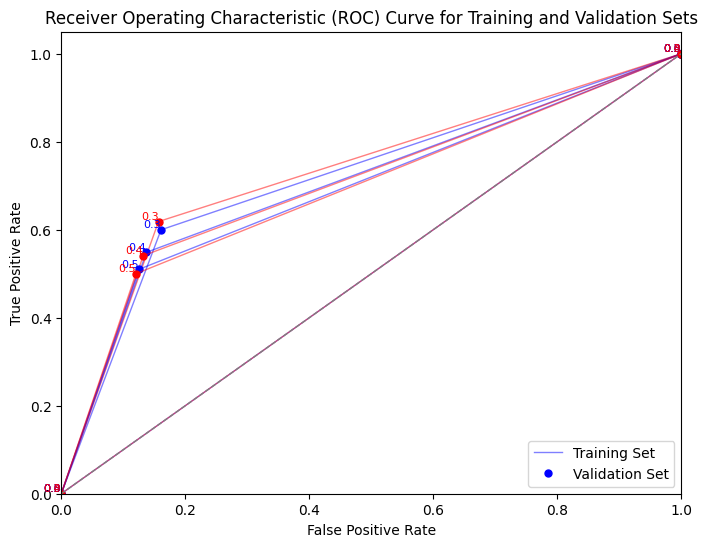

In [188]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

thresholds = [0, 0.3, 0.4, 0.5]
plt.figure(figsize=(8, 6))

for threshold in thresholds:
    # Plot ROC curve for training set
    y_train_pred = (y_train_predsNb >= threshold).astype(int)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    plt.plot(fpr_train, tpr_train, lw=1, color='blue', alpha=0.5)
    plt.plot(fpr_train, tpr_train, 'o', color='blue', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_train, tpr_train):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='blue', fontsize=8, ha='right', va='bottom')

    # Plot ROC curve for validation set
    y_valid_pred = (y_valid_predsNb >= threshold).astype(int)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_pred)
    plt.plot(fpr_valid, tpr_valid, lw=1, color='red', alpha=0.5)
    plt.plot(fpr_valid, tpr_valid, 'o', color='red', markersize=5)  # Add filled dots
    for fpr, tpr in zip(fpr_valid, tpr_valid):
        plt.text(fpr, tpr, f'{threshold:.1f}', color='red', fontsize=8, ha='right', va='bottom')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training and Validation Sets')
plt.legend(['Training Set', 'Validation Set'], loc="lower right")
plt.show()


In [189]:
print('Training:',calculate_classification_metrics(y_train, y_train_predsNb, threshold=0.5))
print('Validation:',calculate_classification_metrics(y_valid, y_valid_predsNb, threshold=0.5))

Training: {'Accuracy': 0.8333940497874924, 'Precision': 0.3402840194139853, 'Recall': 0.5101050929668552, 'F1-score': 0.40823808496872976, 'Confusion Matrix': array([[25559,  3670],
       [ 1818,  1893]]), 'AUC': 0.7638407310399498}
Validation: {'Accuracy': 0.8368139873725109, 'Precision': 0.34523809523809523, 'Recall': 0.5, 'F1-score': 0.4084507042253521, 'Confusion Matrix': array([[3214,  440],
       [ 232,  232]]), 'AUC': 0.7627446539456052}


In [190]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)

    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

**As We Have Done Strattified Split Based on The Percentage of target**
-As Data Naturally Have 0[negative] instances more therefore auccuracy will enevtually grow as

**1)Accuracy=Total Correct Predicted Label/Total no. of label**

>As data have dominance in 0 labels most of the labels will be classified as correct predicted which enventually increases accuracy

>As we can see it in Logistic Regression 1 class labels have high probability and 0 class label have low probaility

>if we increase the threshold it will predict more 0 than 1
and if we decrease the threshold to ex:0.01 then it will predict more 1's than 0

>Threshold 0.3 is good

### **Hence If we do Stratified Split Using Logistic regression will be helpful**

Using stratified train-test split on an imbalanced dataset can still be beneficial, especially if you're primarily concerned with evaluating your model's performance accurately. Here's how it can be helpful:

**Unbiased Evaluation:**

Stratified train-test split ensures that the class distribution in both the training and testing sets resembles that of the original dataset.
This prevents the testing set from being skewed towards the majority class, which could lead to overestimating the model's performance, especially if the minority class is of particular interest.

**Generalization Performance:**

By maintaining the class distribution in the testing set, you get a more realistic estimate of how well your model will perform on unseen data, which is crucial for assessing its generalization performance.
This is important regardless of class imbalance because you want your model to perform well on all classes, not just the majority one.

**Robustness to Changes:**

Ensuring that the class distribution is maintained in the testing set makes your evaluation more robust to changes in the underlying data distribution.
If your dataset changes over time (which is common in real-world scenarios), using a stratified approach helps ensure that your evaluation remains consistent and reliable.

# **Conclusion**

# **Model Training and Evaluation**
Through out the project we have created a machine learning project that will predict wether the customer will subscribe the term deposite or not

We created 3 Classification models With 2 approaches

1st is doing stratified approach where idea was to train model as per the ratio of classes in data this approach gave high accuracy but failed in other matrices as compared to undersampled data

2nd approach gave logistic regression high performanece for threshold of 0.3 acurracy was low but overall matrices where high than 1st approach

We Use ROC Curve to find the best threshold value for given models

# **EDA**
In EDA Process we uncovered various insights from the data and we came up with some strategy For caller to decide whom to call

>Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.out of that, most of the clients contacted in the month of may and also this is the month where clients are not intrested to subscribe the term deposits.very few of the clients are contacted in the months of Mar,Sep and in Dec.It is better to Contact the clients more in these months.
There is more subscription in month of may
But There is good subscription in oct,sep,april,june,july in term of no and yes ratio

>If Multiple Campaigns and multiple contacts are performed for the clients, there is more chance for the client to not intrested to subscribe for the term deposit. Atmost 2 or 3 contacts can be preferred to perform for the clients.


>Occupation of the clients in Retired, student and housemaid are subscribed more to the term deposits.Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.


>From the Analysis,Even the mid-age group clients subscribed more for the term deposits, there is a more domination of clients from this group who are not subscribed for the term deposits.old age group clients are subscribing the term deposits more and count of not subscribing to the deposits is less. It is well for the banks to focus on old age group clients to get more subscriptions for the term deposits.


>Clients who are not intrested to take housing loans may be intrested in subscribing for the term deposits.If the balance of client is above average blance then there is a chance to subscribe for the term deposit.

### dump the model for product use

In [191]:
import pickle
with open('./rfc2.pkl','wb') as file:
    pickle.dump(rfc,file)

### actual values vs encoded values

job type:        

0:admin
1:blue-collar
2:entrepreneur
3:housemaid
4:management
5:retired
6:self-employed
7:services
8:student
9:technician
10:unemployed
11:unknown

maritial status:

0:married
1:single
2:divorced
3:unknown

education level:
0:basic.4y
1:basic.6y
2:basic.9y
3:high.school
4:illiterate
5:professional.course
6:university.degree
7:unknown

default:
0:no
1:yes
2:unknown

housing:
0:no
1:yes
2:unknown

loan:
0:no 
1:yes
2:unknown

contact:
0:cellular
1:telephone

month:
0:jan
1:feb
2:mar
3:apr
4:may
5:june
6:july
7:aug
8:sept
9:oct
10:nov
11:dec


day_of_week:
0:mon
1:tue
2:wed
3:thu
4:fri


